# Empirical Estimation

The last chapters introduce fundamental concepts for empirical analysis on financial markets. We learned about important asset types such as stocks, bonds and options. We introduced the concept of random variables and estimation. For instance, we derived the sample mean as an estimator for the expected value. To analyze developments and key characteristics of financial vehicles on financial markets, we we often need to estimate key statistical properties from observed data. Let's define formal estimators for the central moments and quantiles that form the foundation of financial data analytics and apply them to real data.

## Descriptive Statistics

Let $\{X_1, X_2, \ldots, X_n\}$ be a sample of $n$ independent and identically distributed random variables representing financial returns or prices. The empirical estimators for the mean, variance, skewness, kurtosis, and quantiles are defined as follows:

The **sample mean** is an unbiased estimator of the population mean: 

$$\hat{\mu} = \frac{1}{n}\sum_{i=1}^{n}X_i$$

The **sample variance** is given by: 

$$\hat{\sigma}^2 = \frac{1}{n-1}\sum_{i=1}^{n}(X_i - \hat{\mu})^2$$

where we divide by $n−1$ rather than $n$ to ensure unbiasedness.

**Skewness** measures the asymmetry of the probability distribution and is estimated by: 

$$\hat{S} = \frac{\frac{1}{n}\sum_{i=1}^{n}(X_i - \hat{\mu})^3}{(\hat{\sigma}^2)^{3/2}}$$ 

Positive skewness indicates a distribution with an asymmetric tail extending toward more positive values, while negative skewness indicates a distribution with an asymmetric tail extending toward more negative values.

**Kurtosis** measures the "tailedness" of the probability distribution and is estimated by: 

$$\hat{K} = \frac{\frac{1}{n}\sum_{i=1}^{n}(X_i - \hat{\mu})^4}{(\hat{\sigma}^2)^2}$$

The excess kurtosis is often reported as $\hat{K} - 3$, where 3 is the kurtosis of a normal distribution. Positive excess kurtosis indicates a distribution with heavier tails than a normal distribution.

For a given probability $p \in (0,1)$, the empirical estimator for the $p$-quantile, denoted by $\hat{q}_p$​, is defined as: 

$$
\hat{q}_p = \begin{cases}
\frac{1}{2} \left( X_{(np)} + X_{(np + 1)} \right) & \text{ if } np \text{ is an integer } \\
X_{(\lfloor np + 1 \rfloor)} & \text{ if } np \text{ is not an integer }
\end{cases}
$$

where $X_{(i)}$​ represents the $i$-th order statistic (i.e., the $i$-th smallest value in the sample), and $\lfloor np \rfloor$ denotes the floor function applied to $np$. Basically, each quantile splits the data into two parts such that $p \cdot $ 100\% of the observations are equal to or below and $(1 - p) \cdot $ 100\% of the observations are equal to or above the $p$-quantile. Note that statistical software programs often adjust this approach and try to improve it by, e.g., interpolation.

Let's walk through an example with ten numbers: $[2.3, 1.5, 4.7, -0.8, 3.2, 0.9, 2.8, -1.2, 3.9, 1.7]$.

The sample mean is calculated as the sum of all observations divided by the sample size:

$$
\hat{\mu} = \frac{1}{10}(2.3 + 1.5 + 4.7 + (-0.8) + 3.2 + 0.9 + 2.8 + (-1.2) + 3.9 + 1.7) = \frac{19.0}{10} = 1.9
$$

Next, we calculate the variance:

$$
\hat{\sigma}^2 = \frac{1}{9}\sum_{i=1}^{10}(X_i - 1.9)^2 = \frac{1}{9}(0.16 + 0.16 + 7.84 + 7.29 + 1.69 + 1.00 + 0.81 + 9.61 + 4.00 + 0.04) = \frac{32.6}{9} = 3.62
$$
Then, the standard deviation is the square root of the variance:

$$
\hat{\sigma} = \sqrt{3.62} = 1.90
$$

The skewness is calculated as:

$$
\hat{S} = \frac{\frac{1}{10}\sum_{i=1}^{10}(X_i - 1.9)^3}{(3.62)^{3/2}} = \frac{-0.74}{6.89} = -0.107
$$

This slightly negative skewness indicates a distribution with a slightly longer tail on the left side.

The kurtosis is:

$$
\hat{K} = \frac{\frac{1}{10}\sum_{i=1}^{10}(X_i - 1.9)^4}{(3.62)^2} = \frac{93.96}{13.10} = 7.17
$$

The excess kurtosis (kurtosis - 3) is 4.17, indicating a distribution with heavier tails than a normal distribution.

For the 25\% qunatile, we determine $np=10 \cdot 0.25 = 2.5$ which is not an integer, thus, we use $ X_{(\lfloor 2.5 \rfloor + 1)} = X_{(3)} = 0.9$.

Another interesting estimator for financial data, originating from extreme value theory, is the Hill estimator. We will not delve into its theoretical underpinnings but instead focus on its definition and interpretation. Given independent and identically distributed random variables $X_1, X_2, \dots, X_n$, we define the order statistics sorted in descending order as $X_{(1,n)} \geq X_{(2,n)} \geq \dots \geq X_{(n,n)}$. The Hill estimator based on the top $k$ largest observations is defined as:

$$
\hat{\xi}{k, n} = \frac{1}{k} \sum_{j = 1}^k \left( \ln X_{(j,n)} - \ln X_{(k+1,n)} \right)
$$

This quantity estimates the tail index $\xi$, which governs the heaviness of the distribution’s upper tail. Larger values of $\hat{\xi}_{k,n}$ indicate a heavier tail, meaning a higher likelihood of extreme positive values.

Since this estimator targets the upper tail, it is more sensitive to large (positive) outliers. In financial applications, however, we are often more concerned with the lower tail—that is, with extreme negative outcomes such as large losses or negative returns. To apply the Hill estimator to the lower tail, a common technique is to multiply all observations by -1, effectively reflecting the distribution, and then apply the same formula to the resulting data.

One important practical consideration is the choice of $k$, the number of top order statistics used in the Hill estimator. In empirical work, k is typically chosen to correspond to a high-order quantile, for example, the largest 5% to 10% of the sample. The goal is to find a range of $k$ values over which the estimates $\hat{\xi}{k,n}$ remain relatively stable. This stability is often assessed visually using a Hill plot, where $\hat{\xi}{k,n}$ is plotted against $k$.

While this pragmatic approach does not guarantee that the assumptions of extreme value theory are fully satisfied, it still provides a useful approximation of the distribution’s tail behavior. In particular, it allows us to compare how “extreme” the realizations of one dataset are relative to another, even if the exact theoretical conditions are not met.

When we talk about heavy tails in a distribution, we’re interested in how often extreme values—like very large asset returns or losses—occur. Some distributions, like the Normal, make extreme values very unlikely. Others, like the Pareto or Cauchy, allow for much more dramatic extremes.

The Hill estimator is a simple way to quantify how heavy the upper tail of a distribution is, using only the largest values in a dataset. Here’s a way to think about it:
* imagine lining up your data from largest to smallest.
* focus just on the top few largest values (say, the top 10%).
* Ask: How quickly do these extreme values drop off as we go down the list?

If the drop-off is steep, the tail is thin: extremely large values are rare.
If the drop-off is gradual, the tail is heavy: extremely large values are more likely.

The Hill estimator looks at how big jumps between the largest values are — but it does so on a log scale. Taking logarithms helps us do two things:
1.	Measure relative differences rather than absolute ones — this makes sense when values are very large (e.g., $1000 vs. $2000 is a more meaningful difference than $1 vs. $2 in some contexts).
2.	Flatten the scale so that we can average the gaps between extreme values more effectively.

By comparing each of the top k values to the (k+1)-th largest (i.e., the smallest of the “extreme” group), and doing so on a log scale, we get a summary number: the Hill estimate.

* If the Hill estimate is high, it means that the top values don’t decay very quickly — the distribution has a heavy tail, and we might expect more large outliers.
* If it’s low, it means the extreme values fall off quickly — the tail is light, and outliers are less likely.

In finance, this helps us answer questions like:

“How risky is this asset in terms of rare, extreme losses or gains?”

Just to clarify, how the estimation is done. Suppose we have the following dataset (e.g., returns or positive losses): $X = \lbrace2.1, 3.5, 4.0, 5.8, 6.2, 7.1, 8.5, 10.0, 12.3, 15.0\rbrace$

First, sort in  descending order and sort the data from largest to smallest to get the order statistics:

$$
X_{(1)} = 15.0,\quad X_{(2)} = 12.3,\quad X_{(3)} = 10.0,\quad X_{(4)} = 8.5,\quad \dots
$$

We’ll choose $k = 3$, so we focus on the top 3 values: $X_{(1)}, X_{(2)}, X_{(3)}$, and we also need $X_{(4)}$ = 8.5 for the formula. Determine the natural log of these realizations: 

$$
\ln X_{(1)} = \ln 15.0 \approx 2.7080 \\
\ln X_{(2)} = \ln 12.3 \approx 2.5096 \\
\ln X_{(3)} = \ln 10.0 \approx 2.3026 \\
\ln X_{(4)} = \ln 8.5 \approx 2.1401 \\
$$

Now compute:

$$
\hat{\xi}_{3,10} = \frac{1}{3} \left[ (2.7080 - 2.1401) + (2.5096 - 2.1401) + (2.3026 - 2.1401) \right] = \frac{1}{3} (0.5679 + 0.3695 + 0.1625) = \frac{1.0999}{3} \approx 0.3666
$$

## Empirical stock market analysis

Let us take a look at real empirical data. We collect index values for the S\&P 500 since 1997 and determine daily discrete returns. The figure below is a time series plot which plots returns over time. We also include crisis periods by shaded areas. By this means, we can identify a very common property of daily financial returns which is called **volatility clustering**. As you can see, returns seem to vary in crisis periods. Once the market enters a crisis period, the more volatile behavior persists for a while. Investors perceive higher fluctuations as riskier, even if higher fluctuations also mean greater deviations in positive returns. As investors are risk-averse, greater downward deviations (negative returns) are weighted more heavily. 

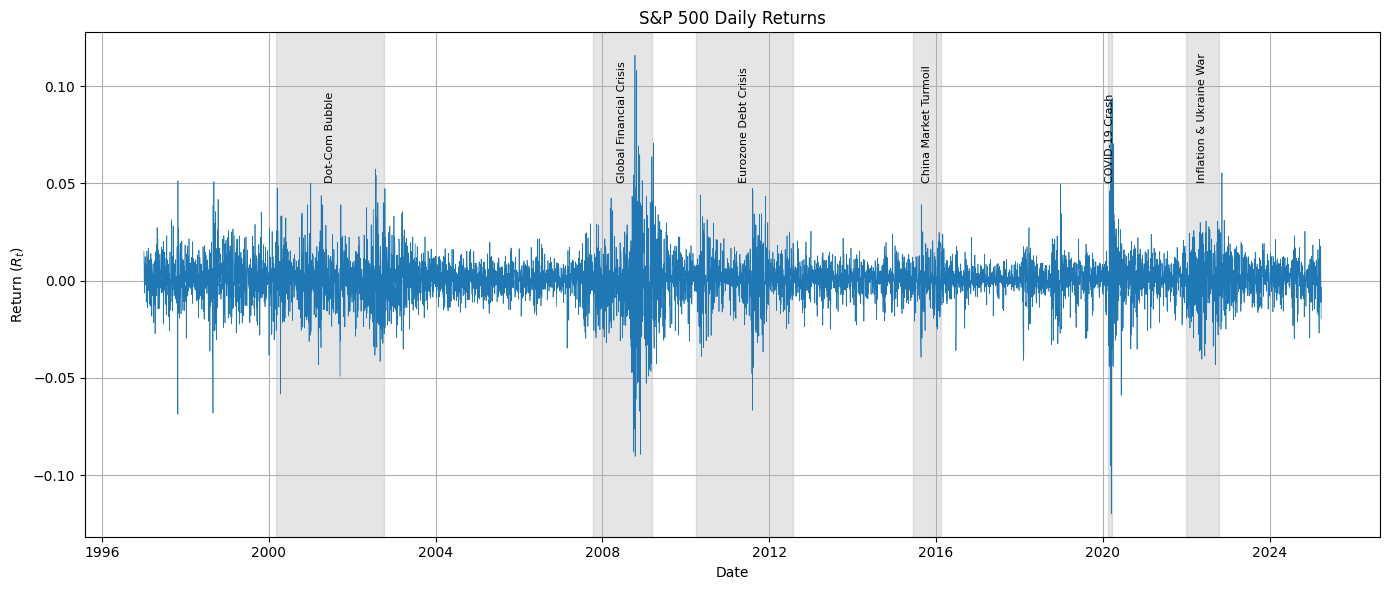

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

try:
    spx = pd.read_csv("../data/chapter_04/sp_data.csv")
    spx["Date"] = pd.to_datetime(spx["Date"])
    spx = spx.set_index("Date")
except:
    # Download S&P 500 data
    spx = yf.download("^GSPC", start="1997-01-01", auto_adjust=True)

    # Compute daily returns
    spx["Daily Return"] = spx["Close"].pct_change()
    spx = spx.iloc[1:, :]
    spx.columns = ["Close", "High", "Low", "Open", "Volume", "R_t"]
    spx.to_csv("../data/chapter_04/sp_data.csv", index = True)

crisis_periods = {
    "dotcom_bubble": {"name": "Dot-Com Bubble", "start": "2000-03-01", "end": "2002-10-09"},
    "global_financial_crisis": {"name": "Global Financial Crisis", "start": "2007-10-09", "end": "2009-03-09"},
    "eurozone_debt_crisis": {"name": "Eurozone Debt Crisis", "start": "2010-04-01", "end": "2012-07-26"},
    "china_market_turmoil": {"name": "China Market Turmoil", "start": "2015-06-12", "end": "2016-02-11"},
    "covid_crash": {"name": "COVID-19 Crash", "start": "2020-02-20", "end": "2020-03-23"},
    "inflation_ukraine_2022": {"name": "Inflation & Ukraine War", "start": "2022-01-01", "end": "2022-10-12"},
}

spx["Crisis Label"] = "None"

for key, period in crisis_periods.items():
    mask = (spx.index >= period["start"]) & (spx.index <= period["end"])
    spx.loc[mask, "Crisis Label"] = period["name"]


plt.figure(figsize=(14, 6))
plt.plot(spx.index, spx["R_t"], linewidth=0.5)

for period in crisis_periods.values():
    start = pd.to_datetime(period["start"])
    end = pd.to_datetime(period["end"])
    plt.axvspan(start, end, color='grey', alpha=0.2)
    midpoint = start + (end - start) / 2
    plt.text(midpoint, 0.05, period["name"], rotation=90, ha='center', va='bottom', fontsize=8, color='black')

plt.title("S&P 500 Daily Returns")
plt.xlabel("Date")
plt.ylabel(r"Return ($R_t$)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

def hill_estimator(data: np.ndarray, k: int, tail: str = "upper") -> float:
    if k <= 0 or k >= len(data):
        raise ValueError("k must be between 1 and len(data) - 1")

    if tail == "upper":
        sorted_data = np.sort(data)[::-1]
    elif tail == "lower":
        sorted_data = np.sort(-data)[::-1]
    else:
        raise ValueError("tail must be 'upper' or 'lower'")

    top_k = sorted_data[:k]
    x_k1 = sorted_data[k]

    logs = np.log(top_k) - np.log(x_k1)
    hill_est = np.mean(logs)

    return hill_est

def describe_with_moments(data, percentiles = (0.05, 0.95), fisher=True, include_hill=True, k_ratio=0.05):
    """
    Extended descriptive stats with skewness, kurtosis, and Hill estimator.

    Parameters:
    - data: pd.Series or pd.DataFrame
    - fisher: If True, returns Fisher kurtosis (normal=0); else Pearson (normal=3)
    - include_hill: Whether to include Hill estimator for tails (only for Series)
    - k_ratio: Fraction of sample to use for Hill estimator (e.g., 0.05 means top 5%)

    Returns:
    - pd.Series or pd.DataFrame with added statistics
    """
    if isinstance(data, pd.Series):
        desc = data.describe(percentiles=percentiles)
        clean_data = data.dropna().values
        k = int(len(clean_data) * k_ratio)

        extra = {
            "skew": skew(clean_data),
            "kurtosis": kurtosis(clean_data, fisher=fisher)
        }

        if include_hill and k > 0:
            extra["hill_upper"] = hill_estimator(clean_data, k, tail="upper")
            extra["hill_lower"] = hill_estimator(clean_data, k, tail="lower")

        return pd.concat([desc, pd.Series(extra)])

    elif isinstance(data, pd.DataFrame):
        desc = data.describe(percentiles=percentiles)
        for col in data.columns:
            col_data = data[col].dropna().values
            k = int(len(col_data) * k_ratio)
            desc.loc["skew", col] = skew(col_data)
            desc.loc["kurtosis", col] = kurtosis(col_data, fisher=fisher)
            if include_hill and k > 0:
                desc.loc["hill_upper", col] = hill_estimator(col_data, k, "upper")
                desc.loc["hill_lower", col] = hill_estimator(col_data, k, "lower")
        return desc

    else:
        raise TypeError("Input must be a pandas Series or DataFrame")

The cell below determines descriptive statistics for the daily returns from the figure above. We take a look at these statistics over the full period, only the crisis periods and the non-crisis periods. Examining these statistics holistically shows that financial crises are not just higher-volatility periods, but structurally different in terms of tail risk and asymmetry. 

During the crisis period:
* The hill estimator for the lower tail is higher 
* The 5\% quantile is lower
* Kurtosis is slightly higher
* Minimum and maximum is more extreme

In [3]:
returns_overall = spx["R_t"]
returns_crisis = spx.loc[spx["Crisis Label"] != "None", "R_t"].dropna()
returns_non_crisis = spx.loc[spx["Crisis Label"] == "None", "R_t"].dropna()

desc_overall = describe_with_moments(returns_overall)
desc_crisis = describe_with_moments(returns_crisis)
desc_non_crisis = describe_with_moments(returns_non_crisis)
comparison = pd.DataFrame({"Full": desc_overall, "Crisis": desc_crisis, "Non-Crisis": desc_non_crisis})
print(comparison)

                   Full       Crisis   Non-Crisis
count       7104.000000  1985.000000  5119.000000
mean           0.000359    -0.000909     0.000851
std            0.012165     0.016865     0.009709
min           -0.119841    -0.119841    -0.068657
5%            -0.018504    -0.027018    -0.014689
50%            0.000671    -0.000364     0.000872
95%            0.017459     0.023888     0.015411
max            0.115800     0.115800     0.093828
skew          -0.180188    -0.178286     0.177337
kurtosis       9.510842     6.397881     6.280152
hill_upper     0.390793     0.388954     0.328835
hill_lower     0.381063     0.363625     0.347228


This can also be seen visually when dividing the empirical distribution in crisis and non-crisis period.

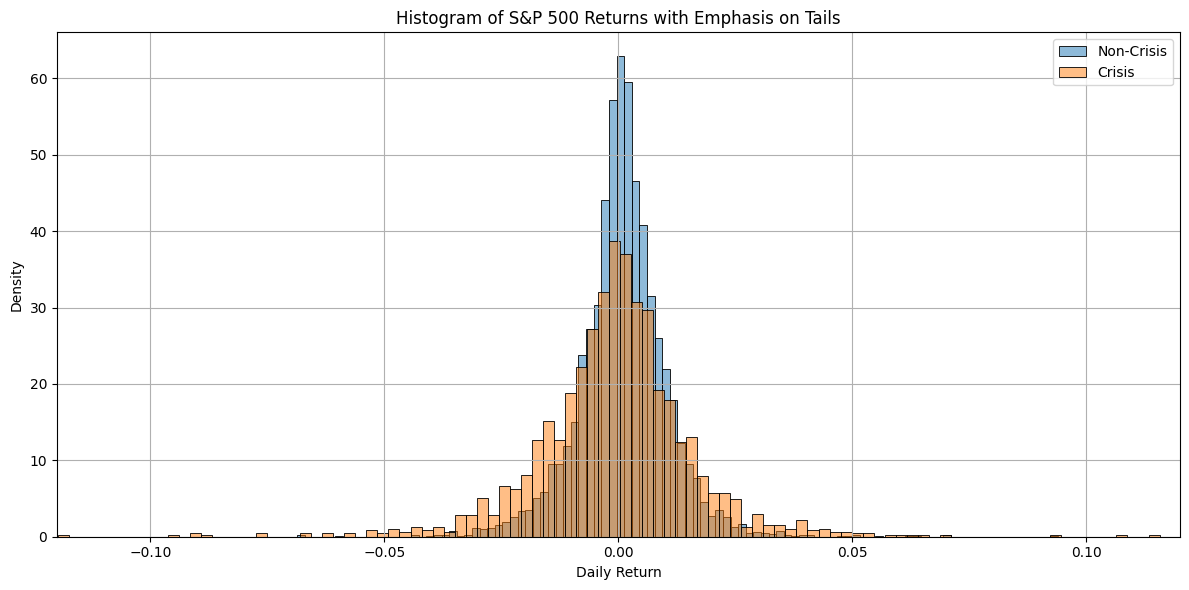

In [4]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(returns_non_crisis, bins=100, label='Non-Crisis', kde=False, stat='density', alpha=0.5)
sns.histplot(returns_crisis, bins=100, label='Crisis', kde=False, stat='density', alpha=0.5)
plt.xlim(-0.12, 0.12)
plt.title("Histogram of S&P 500 Returns with Emphasis on Tails")
plt.xlabel("Daily Return")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Empirical sovereign bond analysis

To understand the behavior of sovereign bonds in financial markets, this section examines the descriptive properties of bond exchange-traded funds (ETFs), which offer a practical and intuitive way to analyze bond performance. Unlike yield-based measures, which represent annualized rates of return for holding a bond to maturity, bond ETF prices reflect the realized total return from day to day — including price changes, accrued interest, and reinvested coupons. This makes them directly comparable to equity returns and more suitable for empirical return-based analysis. In addition, bond ETFs eliminate the need for yield-to-price approximations, duration assumptions, or interpolations from constant maturity yield curves. As a result, they provide a clean, market-based proxy for sovereign bond returns that is especially useful for analyzing volatility, correlation with equities, and flight-to-safety behavior during periods of financial stress.

The figure below exhibits discrete returns of two bond ETFs which invest mostly into sovereign bonds, SHY with an emphasis on shorter maturities (1-3 years) and IEF with maturities of medium range (7-10 years). In comparison to the stock index we observe a smaller range of return realizations and less difference regarding the volatility behavior in crisis and non-crisis periods. 

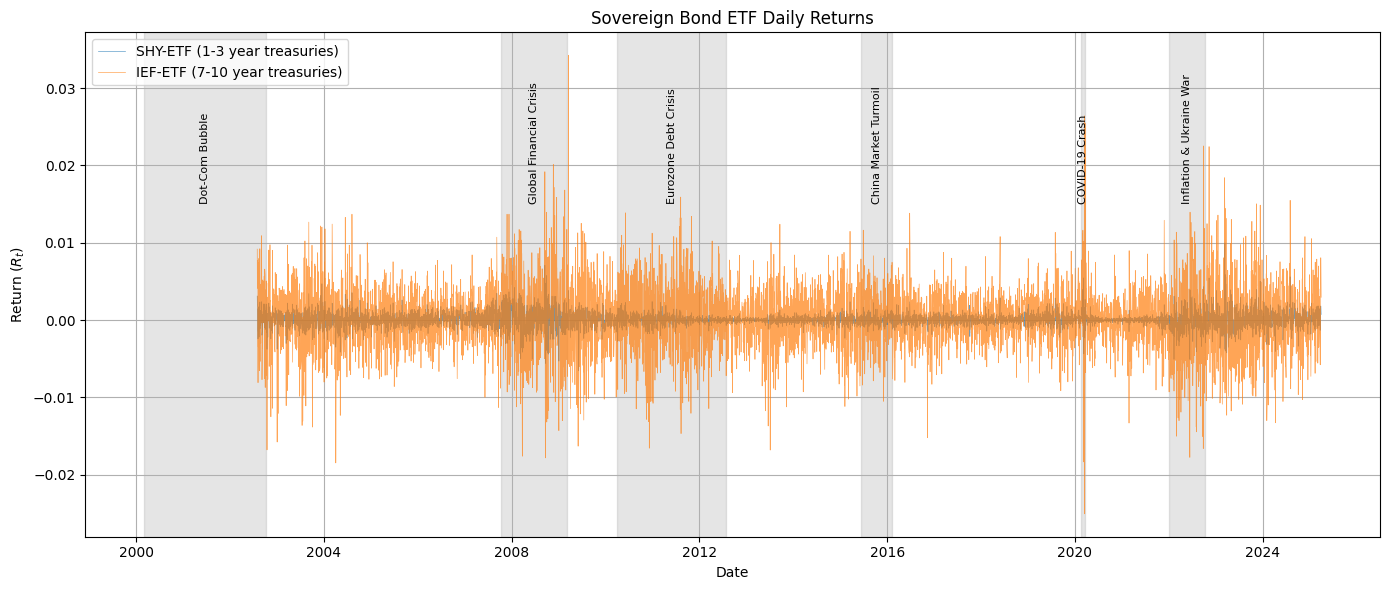

In [5]:
import yfinance as yf
import pandas as pd

try:
    bond_returns = pd.read_csv("../data/chapter_04/bond_etf_returns.csv")
    bond_returns["Date"] = pd.to_datetime(bond_returns["Date"])
    bond_returns = bond_returns.set_index("Date")
except:
    bond_etfs = ["SHY", "IEF"]
    bond_data = yf.download(bond_etfs, start="1997-01-01")["Close"]
    bond_returns = bond_data.pct_change().dropna()
    bond_returns.to_csv("../data/chapter_04/bond_etf_returns.csv")

crisis_periods = {
    "dotcom_bubble": {"name": "Dot-Com Bubble", "start": "2000-03-01", "end": "2002-10-09"},
    "global_financial_crisis": {"name": "Global Financial Crisis", "start": "2007-10-09", "end": "2009-03-09"},
    "eurozone_debt_crisis": {"name": "Eurozone Debt Crisis", "start": "2010-04-01", "end": "2012-07-26"},
    "china_market_turmoil": {"name": "China Market Turmoil", "start": "2015-06-12", "end": "2016-02-11"},
    "covid_crash": {"name": "COVID-19 Crash", "start": "2020-02-20", "end": "2020-03-23"},
    "inflation_ukraine_2022": {"name": "Inflation & Ukraine War", "start": "2022-01-01", "end": "2022-10-12"},
}

bond_returns["Crisis Label"] = "None"

for key, period in crisis_periods.items():
    mask = (bond_returns.index >= period["start"]) & (bond_returns.index <= period["end"])
    bond_returns.loc[mask, "Crisis Label"] = period["name"]


plt.figure(figsize=(14, 6))
plt.plot(bond_returns.index, bond_returns["SHY"], linewidth=0.5, alpha = 0.7, label = "SHY-ETF (1-3 year treasuries)")
plt.plot(bond_returns.index, bond_returns["IEF"], linewidth=0.5, alpha = 0.7, label = "IEF-ETF (7-10 year treasuries)")
plt.legend()

for period in crisis_periods.values():
    start = pd.to_datetime(period["start"])
    end = pd.to_datetime(period["end"])
    plt.axvspan(start, end, color='grey', alpha=0.2)
    midpoint = start + (end - start) / 2
    plt.text(midpoint, 0.015, period["name"], rotation=90, ha='center', va='bottom', fontsize=8, color='black')

plt.title("Sovereign Bond ETF Daily Returns")
plt.xlabel("Date")
plt.ylabel(r"Return ($R_t$)")
plt.grid(True)
plt.tight_layout()
plt.show()

Taking a look at the descriptive statistics below, we observe a higher average return during crisis periods in comparison to non-crisis periods. This characterizes a higher demand and on average higher positve price changes during critical times. At the same time, volatility and adverse return realizations (quantified by the lower 5\%-quantile) are higher during crisis periods, however, moderate in comparison to the stock index.

In [6]:
bond_returns_crisis = bond_returns.loc[bond_returns["Crisis Label"] != "None", ["IEF", "SHY"]].dropna()
bond_returns_non_crisis = bond_returns.loc[bond_returns["Crisis Label"] == "None", ["IEF", "SHY"]].dropna()

desc_bonds_overall = describe_with_moments(bond_returns.drop(["Crisis Label"], axis = 1))
desc_bonds_crisis = describe_with_moments(bond_returns_crisis)
desc_bonds_non_crisis = describe_with_moments(bond_returns_non_crisis)
comparison_bond = pd.concat((desc_bonds_overall, desc_bonds_crisis, desc_bonds_non_crisis), axis = 1)
comparison_bond.columns = ["IEF-Full", "SHY-Full", "IEF-Crisis", "SHY-Crisis", "IEF-Non-Crisis", "SHY-Non-Crisis"]
comparison_bond

,IEF-Full,SHY-Full,IEF-Crisis,SHY-Crisis,IEF-Non-Crisis,SHY-Non-Crisis
count,5704.000000,5704.000000,1380.000000,1380.000000,4324.000000,4324.000000
mean,0.000151,0.000076,0.000364,0.000084,0.000083,0.000074
std,0.004333,0.000961,0.005546,0.001212,0.003865,0.000866
min,-0.025072,-0.006566,-0.025072,-0.005614,-0.018489,-0.006566
5%,-0.006827,-0.001325,-0.008538,-0.001795,-0.006145,-0.001217
50%,0.000238,0.000000,0.000495,0.000118,0.000187,0.000000
95%,0.006850,0.001608,0.008892,0.002159,0.006101,0.001437
max,0.034262,0.009974,0.026416,0.007094,0.034262,0.009974
skew,0.084762,0.281683,0.001218,-0.068221,0.100617,0.559662
kurtosis,2.529146,7.205682,1.211967,3.992562,2.823517,8.879630


## Volatilty analysis

Chapter 1 introduced options and the possibility to derive implied volatility. Implied volatility can be interpreted as a forward looking volatility estimate. We can compare this to the empirical estimator which has been introduced in the beginning of this chapter. For this taks, we compare the VIX to empirical estimates which use a rolling window of historical data.

The VIX measures the market's expectation of volatility over the next 30 calendar days, derived from S&P 500 option prices with maturities between 23 and 37 days. It is annualized and in per cent, thus, a value of the VIX of 20 means that the annual volatility estimate is equal to $0.20$. In comparison to that we can determine a volatility estimate from the past days, e.g., around 20 days, and transfrom this daily volatility estimate to an annual estimate by:

$$
\hat{\sigma}_{\text{annual}} = \sqrt{252} \cdot \hat{\sigma}_{\text{daily}}
$$

This transformation is based on the simplified assumption that daily observations are independent and identically distributed random variables. We learned in Chapter 1 that log-returns are additive over time. This means that if we want to determine, e.g., the annual return, we can simply sum over daily return within that year. Together with the independent and identically distributed assumption, the volatility of every day's log return is the same. Thus, as shown in Chapter 2, the variance for a sum of random variables:

$$Y = a_1 X_1 + a_2 X_2 + \ldots + a_n X_n = \sum_{i=1}^n a_i X_i$$

simplifies from:

$$\text{Var}(Y) = \text{Var}\left(\sum_{i=1}^n a_i X_i\right) = \sum_{i=1}^n \underbrace{a_i^2}_{=1} \text{Var}(X_i) + \underbrace{ 2\sum_{i < j} a_i a_j \text{Cov}(X_i, X_j)}_{=0 \text{ due to independence}}$$

to:

$$\text{Var}(Y) = \sum_{i=1}^n \text{Var}(X_i) = n \cdot \text{Var}(X)$$

This means for a sum of $n=252$ log-returns (one year has approximately $252$ trading days). The variance is $252$ times the daily variance estimate.

In the figure below, at every point in time, we use the past $21$ days to determine a daily volatility estimate, this is annualized and multiplied by $100$ (as the VIX is in per cent). Thus, at every day, we can compare the volatility estimate of historical data (blue line) to the one which is build on investors' perception what is going to happen within the next 30 calender days. 

```{Why these number of days:}

The **VIX** measures the **market's expectation of volatility over the next 30 calendar days**, derived from S&P 500 option prices with maturities between 23 and 37 days. It is a **forward-looking** measure.

To compare this to **historical volatility**, we use a **21-day rolling window** because:

- There are roughly **21 trading days in a typical month**.
- This aligns with the VIX's 30-day horizon, which is based on calendar days.
- It allows for a meaningful comparison between **past realized volatility** and **expected future volatility**.
```



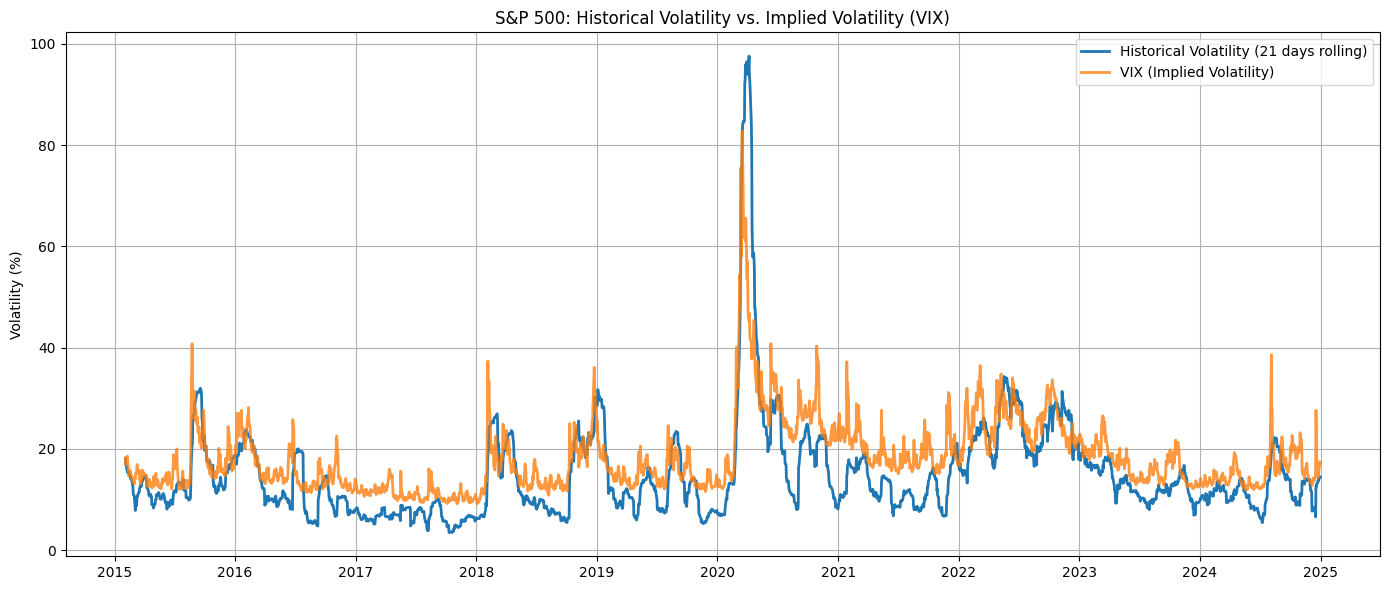

In [7]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

try:
    vix = pd.read_csv("../data/chapter_04/vola_est_vix.csv")
    vix["Date"] = pd.to_datetime(vix["Date"])
    vix.set_index("Date", inplace = True)
    sp500 = pd.read_csv("../data/chapter_04/vola_est_sp.csv")
    sp500["Date"] = pd.to_datetime(sp500["Date"])
    sp500.set_index("Date", inplace = True)
except:
    # Download historical data
    start_date = "2015-01-01"
    end_date = "2025-01-01"
    sp500 = yf.download("^GSPC", start=start_date, end=end_date)
    vix = yf.download("^VIX", start=start_date, end=end_date)
    sp500.columns = sp500.columns.get_level_values(0)
    vix.columns = vix.columns.get_level_values(0)
    sp500.to_csv("../data/chapter_04/vola_est_sp.csv")
    vix.to_csv("../data/chapter_04/vola_est_vox.csv")

sp500['log_return'] = np.log(sp500['Close'] / sp500['Close'].shift(1))

# Compute historical volatility (e.g. 21-day rolling std dev of daily returns, annualized)
rolling_window = 21
trading_days = 252
sp500['hist_vol'] = (
    sp500['log_return'].rolling(window=rolling_window)
    .std()
    * np.sqrt(trading_days)
)

# Combine with VIX (already annualized in % terms)
combined = pd.DataFrame({
    'Hist Vol': sp500['hist_vol'] * 100,
    'VIX': vix['Close']
}).dropna()

# Plot
plt.figure(figsize=(14, 6))
plt.plot(combined.index, combined['Hist Vol'], label=f'Historical Volatility ({rolling_window} days rolling)', linewidth=2)
plt.plot(combined.index, combined['VIX'], label='VIX (Implied Volatility)', linewidth=2, alpha=0.8)
plt.legend()
plt.title('S&P 500: Historical Volatility vs. Implied Volatility (VIX)')
plt.ylabel('Volatility (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

We typically observe a positive correlation between historical (realized) volatility and the VIX (implied volatility), but the relationship is far from perfect. The actual correlation between both for the example above is:

In [8]:
correlation = combined['Hist Vol'].corr(combined['VIX'])
print(f"Correlation between Historical Vol and VIX: {correlation:.2f}")

Correlation between Historical Vol and VIX: 0.83


 Possible reasons and explanations are:

### Why a Positive Correlation Exists:
- Volatility clustering: High past volatility tends to be followed by high future volatility. Since the VIX is forward-looking and historical volatility is backward-looking, they often move in the same direction.
- Shared information: Both measures are influenced by major market events — a sudden crash, for instance, raises both historical and implied volatility.
- Market memory: The options market (which determines the VIX) incorporates recent volatility into its pricing of expected future risk.

### Why the Correlation Isn’t Perfect:
- Different time perspectives:
  - VIX is based on market expectations of future volatility (next 30 calendar days).
  - Historical volatility looks backward, typically over the last 21 trading days.
  
- VIX includes a risk premium:
  - The VIX reflects not just expected volatility but also investor demand for protection.
  - This "variance risk premium" can cause the VIX to overestimate actual future volatility.

- Behavioral factors**:
  - During crises or uncertainty, investors tend to overreact, pushing VIX up even if actual volatility hasn't materialized yet.
  - In calm periods, the VIX might remain elevated if uncertainty about future events lingers.

- Mean reversion effects:
  - Realized volatility can be high in a recent period, but market participants may expect it to cool down, leading to a lower VIX (or vice versa).

## Cryptocurrencies

The analysis of bonds and stocks shows that stocks usually are more risky but also more profitable than bonds. Bonds tend to offer more stable income streams and lower volatility, which makes them a popular choice for conservative investors. Stocks, on the other hand, typically provide higher returns in exchange for increased risk and exposure to market fluctuations.

Let us compare this traditional risk–return tradeoff to Bitcoin, the most popular representative of the cryptocurrency asset class. Bitcoin emerged in the wake of the 2008 financial crisis as a radical alternative to fiat currencies and has evolved significantly over time. Although its early years were marked by limited adoption and high technical risk, Bitcoin became a major focus of global financial markets around 2017, when its price surged dramatically and it began to attract attention from institutional investors.

Unlike bonds and stocks, Bitcoin exhibits characteristics of both an investment asset and a speculative instrument. Its high volatility has made it appealing for traders seeking large returns, but it has also introduced considerable risk for long-term investors. As we examine Bitcoin alongside bonds and stocks, we can explore how its risk–return profile differs from traditional asset classes.

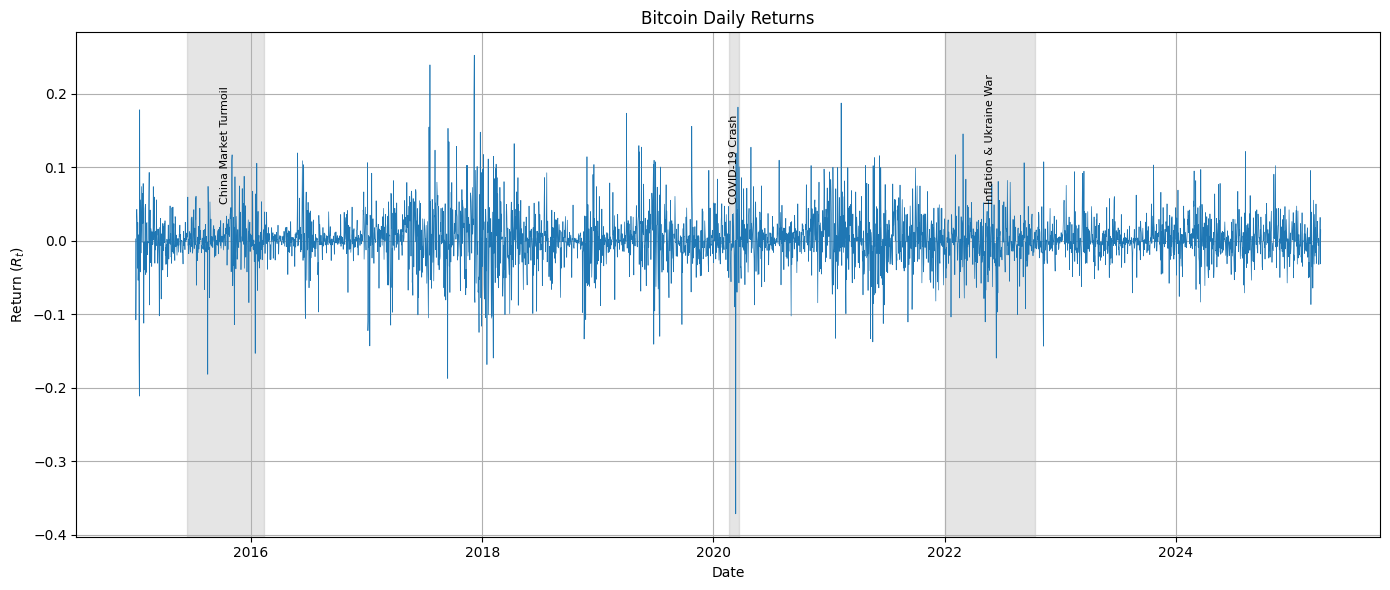

In [9]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

try:
    btc = pd.read_csv("../data/chapter_04/btc_data.csv")
    btc["Date"] = pd.to_datetime(btc["Date"])
    btc = btc.set_index("Date")
except:
    # Download S&P 500 data
    btc = yf.download("BTC-USD", start="2015-01-01", auto_adjust=True)
    btc.columns = btc.columns.get_level_values(0)
    # Compute daily returns
    btc["R_t"] = btc["Close"].pct_change()
    btc = btc.iloc[1:, :]
    btc.to_csv("../data/chapter_04/btc_data.csv", index = True)

crisis_periods = {
    "china_market_turmoil": {"name": "China Market Turmoil", "start": "2015-06-12", "end": "2016-02-11"},
    "covid_crash": {"name": "COVID-19 Crash", "start": "2020-02-20", "end": "2020-03-23"},
    "inflation_ukraine_2022": {"name": "Inflation & Ukraine War", "start": "2022-01-01", "end": "2022-10-12"},
}

btc["Crisis Label"] = "None"

for key, period in crisis_periods.items():
    mask = (btc.index >= period["start"]) & (btc.index <= period["end"])
    btc.loc[mask, "Crisis Label"] = period["name"]


plt.figure(figsize=(14, 6))
plt.plot(btc.index, btc["R_t"], linewidth=0.5)

for period in crisis_periods.values():
    start = pd.to_datetime(period["start"])
    end = pd.to_datetime(period["end"])
    plt.axvspan(start, end, color='grey', alpha=0.2)
    midpoint = start + (end - start) / 2
    plt.text(midpoint, 0.05, period["name"], rotation=90, ha='center', va='bottom', fontsize=8, color='black')

plt.title("Bitcoin Daily Returns")
plt.xlabel("Date")
plt.ylabel(r"Return ($R_t$)")
plt.grid(True)
plt.tight_layout()
plt.show()

The descriptive statistics show that Bitcoin is by far more risky and profitable than the S\&P 500 index. This underlines its reputation as a speculative asset. Furthermore, it also exhibits less profit and more risk during financial crisis periods within the last ten years.

In [10]:
btc_returns_overall = btc["R_t"]
btc_returns_crisis = btc.loc[btc["Crisis Label"] != "None", "R_t"].dropna()
btc_returns_non_crisis = btc.loc[btc["Crisis Label"] == "None", "R_t"].dropna()

btc_desc_overall = describe_with_moments(btc_returns_overall)
btc_desc_crisis = describe_with_moments(btc_returns_crisis)
btc_desc_non_crisis = describe_with_moments(btc_returns_non_crisis)
btc_comparison = pd.DataFrame({"Full": btc_desc_overall, "Crisis": btc_desc_crisis, "Non-Crisis": btc_desc_non_crisis})
print(btc_comparison)

                   Full      Crisis   Non-Crisis
count       3745.000000  563.000000  3182.000000
mean           0.002148   -0.000606     0.002636
std            0.036077    0.038599     0.035597
min           -0.371695   -0.371695    -0.211449
5%            -0.055066   -0.060252    -0.053428
50%            0.001297   -0.001287     0.001656
95%            0.057392    0.052732     0.059416
max            0.252472    0.181878     0.252472
skew          -0.129039   -1.597136     0.208620
kurtosis       7.652910   17.814366     5.021953
hill_upper     0.405980    0.443347     0.377081
hill_lower     0.367757    0.385532     0.378051


## Commodity analysis

When analyzing financial markets, commodities deserve attention alongside stocks, bonds, and cryptocurrencies because they reflect fundamental economic forces such as inflation, supply chain disruptions, and geopolitical tensions. Among all commodities, gold and silver stand out due to their dual roles: they are both precious metals with industrial uses and historically important stores of value. Gold, in particular, is often viewed as a safe-haven asset during times of market stress, while silver combines monetary appeal with strong industrial demand, making it more sensitive to economic cycles.

Beyond precious metals, other important commodities in macro-financial analysis include:
* Oil (e.g., Brent or WTI) — critical for global growth, energy pricing, and inflation dynamics.
* Copper — often considered a “barometer of global manufacturing” and economic health.
* Agricultural commodities (e.g., wheat, corn, soybeans) — relevant for food inflation and emerging markets.

Analyzing commodities like gold and silver allows us to explore how real assets interact with financial instruments, and how they respond to inflation expectations, interest rate changes, and risk sentiment — making them a valuable part of any multi-asset comparison.

In analogy to the previous analyses in this chapter, we take a look at a gold and silver ETF and its price development which is quantified by discrete returns.

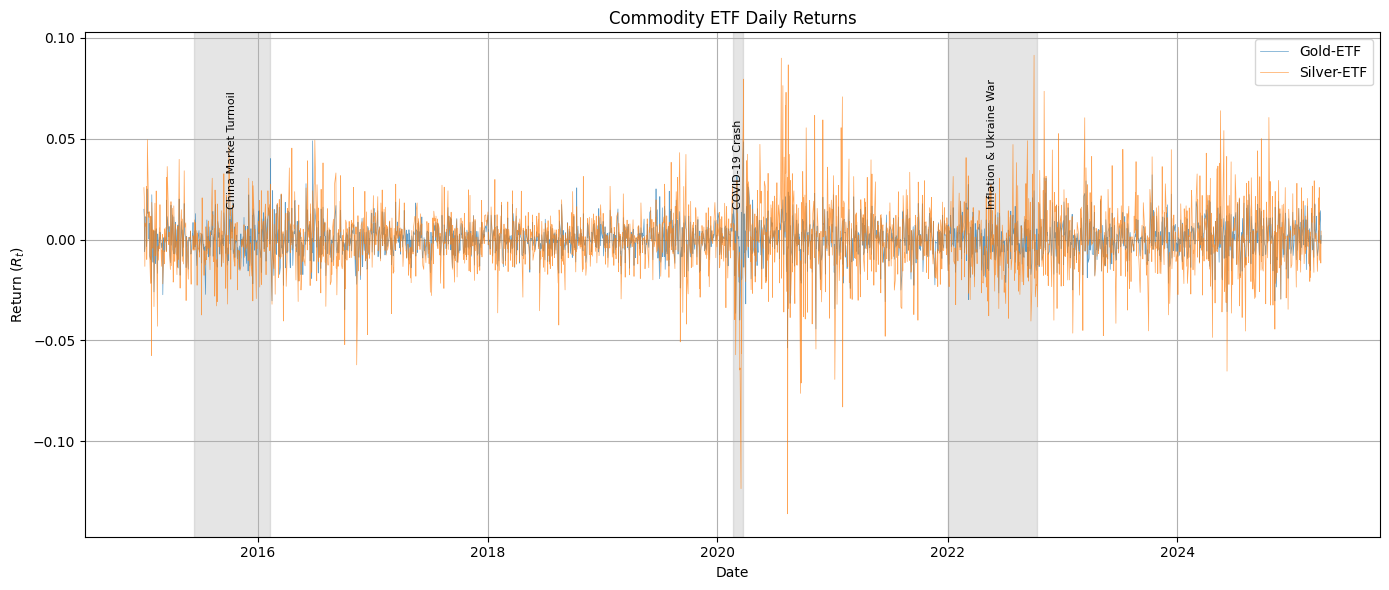

In [11]:
import yfinance as yf
import pandas as pd

try:
    commodity_returns = pd.read_csv("../data/chapter_04/commodity_etf_returns.csv")
    commodity_returns["Date"] = pd.to_datetime(commodity_returns["Date"])
    commodity_returns = commodity_returns.set_index("Date")
except:
    commodity_etfs = ["GLD", "SLV"]
    commodity_data = yf.download(commodity_etfs, start="2015-01-01")["Close"]
    commodity_returns = commodity_data.pct_change().dropna()
    commodity_returns.to_csv("../data/chapter_04/commodity_etf_returns.csv")

crisis_periods = {
    "china_market_turmoil": {"name": "China Market Turmoil", "start": "2015-06-12", "end": "2016-02-11"},
    "covid_crash": {"name": "COVID-19 Crash", "start": "2020-02-20", "end": "2020-03-23"},
    "inflation_ukraine_2022": {"name": "Inflation & Ukraine War", "start": "2022-01-01", "end": "2022-10-12"},
}

commodity_returns["Crisis Label"] = "None"

for key, period in crisis_periods.items():
    mask = (commodity_returns.index >= period["start"]) & (commodity_returns.index <= period["end"])
    commodity_returns.loc[mask, "Crisis Label"] = period["name"]


plt.figure(figsize=(14, 6))
plt.plot(commodity_returns.index, commodity_returns["GLD"], linewidth=0.5, alpha = 0.7, label = "Gold-ETF")
plt.plot(commodity_returns.index, commodity_returns["SLV"], linewidth=0.5, alpha = 0.7, label = "Silver-ETF")
plt.legend()

for period in crisis_periods.values():
    start = pd.to_datetime(period["start"])
    end = pd.to_datetime(period["end"])
    plt.axvspan(start, end, color='grey', alpha=0.2)
    midpoint = start + (end - start) / 2
    plt.text(midpoint, 0.015, period["name"], rotation=90, ha='center', va='bottom', fontsize=8, color='black')

plt.title("Commodity ETF Daily Returns")
plt.xlabel("Date")
plt.ylabel(r"Return ($R_t$)")
plt.grid(True)
plt.tight_layout()
plt.show()

In comparison between both precious metals, silver seems to be a more risky and more profitable asset than gold. In comparison to the other assets they seem to lay between bonds and stocks regarding their risk-profitability profile. 

In [12]:
commodity_returns_crisis = commodity_returns.loc[commodity_returns["Crisis Label"] != "None", ["GLD", "SLV"]].dropna()
commodity_returns_non_crisis = commodity_returns.loc[commodity_returns["Crisis Label"] == "None", ["GLD", "SLV"]].dropna()

desc_commodities_overall = describe_with_moments(commodity_returns.drop(["Crisis Label"], axis = 1))
desc_commodities_crisis = describe_with_moments(commodity_returns_crisis)
desc_commodities_non_crisis = describe_with_moments(commodity_returns_non_crisis)
comparison_commodities = pd.concat((desc_commodities_overall, desc_commodities_crisis, desc_commodities_non_crisis), axis = 1)
comparison_commodities.columns = ["GLD-Full", "SLV-Full", "GLD-Crisis", "SLV-Crisis", "GLD-Non-Crisis", "SLV-Non-Crisis"]
comparison_commodities

,GLD-Full,SLV-Full,GLD-Crisis,SLV-Crisis,GLD-Non-Crisis,SLV-Non-Crisis
count,2577.000000,2577.000000,388.000000,388.000000,2189.000000,2189.000000
mean,0.000399,0.000416,-0.000150,-0.001277,0.000496,0.000716
std,0.008884,0.016714,0.010298,0.018469,0.008608,0.016370
min,-0.053694,-0.135926,-0.039888,-0.123448,-0.053694,-0.135926
5%,-0.014043,-0.024992,-0.016053,-0.028918,-0.013428,-0.024121
50%,0.000522,0.000597,-0.000150,-0.000798,0.000576,0.000634
95%,0.014873,0.026809,0.015219,0.026773,0.014710,0.026773
max,0.049038,0.091429,0.044180,0.091429,0.049038,0.089985
skew,-0.110010,-0.125671,0.065642,-0.537284,-0.147678,-0.006133
kurtosis,2.681618,5.780630,1.939894,6.646181,2.807990,5.405114


Gold and silver typically exhibit a strong positive correlation, often ranging between 0.6 and 0.9 over long time periods (for our period its correlation is about 0.8). This is because both metals respond to similar macroeconomic drivers, such as inflation expectations, interest rate changes, and safe-haven demand during market stress. However, the correlation is not perfect — silver has a more cyclical component due to its industrial uses, making it more sensitive to global economic activity. As a result, silver often behaves like a high-beta version of gold, outperforming in bull markets but also experiencing sharper declines during downturns.

In [13]:
correlation = commodity_returns.drop(["Crisis Label"], axis = 1).corr().loc["GLD", "SLV"]
print(f"Correlation between discrete returns of Gold and Silver ETFs: {correlation:.2f}")

Correlation between discrete returns of Gold and Silver ETFs: 0.78


Due to their correlation, it is interesting how their prices evolve over time. For this purpose, the gold-to-silver ratio measures how many ounces of silver are equivalent in price to one ounce of gold. Historically, this ratio has averaged between 55 and 65, though it has experienced wide swings depending on market conditions. A high ratio (e.g., above 80) suggests that silver is relatively undervalued compared to gold, while a low ratio (e.g., below 40) may indicate the opposite. Investors and traders often watch this ratio for mean-reversion opportunities, or as a signal of shifts in monetary policy expectations, inflation risk, or economic momentum.

When comparing ETF prices such as GLD (gold) and SLV (silver), we can apply the same concepts used in spot price analysis, including the gold-to-silver ratio and their historical correlation. These ETFs are designed to closely track the spot prices of physical metals, so analyzing their price movements provides a practical and accessible way to study the relationship between gold and silver in financial markets.

In the figure below, we compare the GLD to SLV ETF prices. We observe a variation of the gold-to-silver ration around its average over time. This indicates a characteristic which is called mean-reversion and very popular in finance.

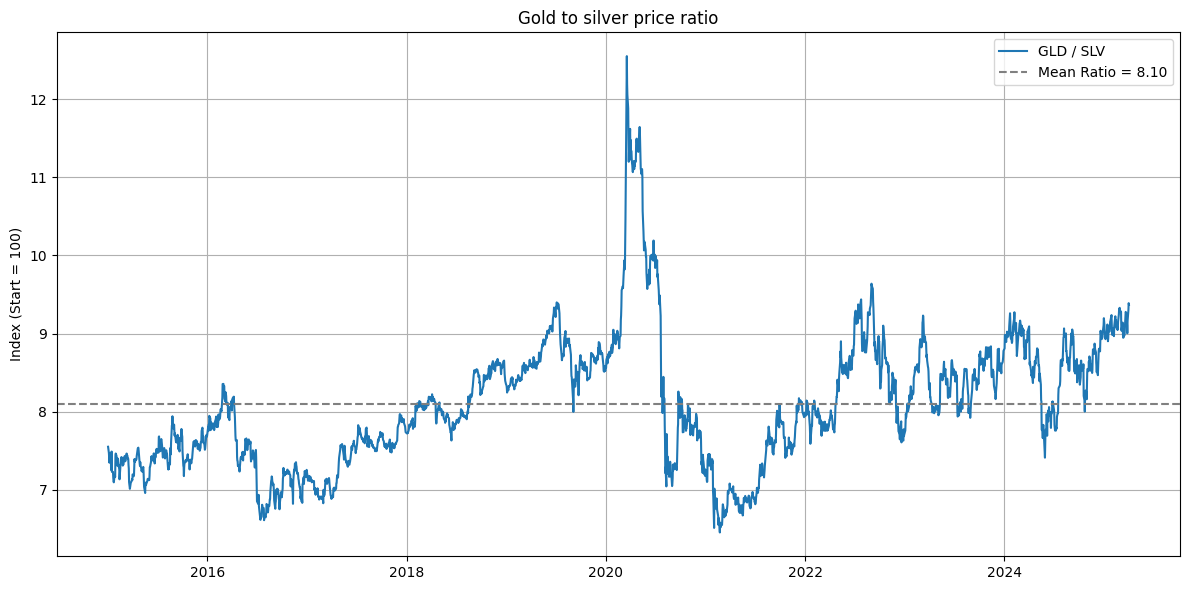

In [14]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

try:
    metals = pd.read_csv("../data/chapter_04/metals.csv")
    metals["Date"] = pd.to_datetime(metals["Date"])
    metals.set_index("Date", inplace = True)
except:
    start = "2015-01-01"
    metals = yf.download(["GLD", "SLV"], start=start)['Close']
    metals = metals.dropna()
    metals.to_csv("../data/chapter_04/metals.csv")

# Compute ratios
gold_silver_ratio = metals['GLD'] / metals['SLV']

# Calculate the empirical mean
mean_ratio = gold_silver_ratio.mean()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(gold_silver_ratio, label='GLD / SLV')
plt.axhline(mean_ratio, color='gray', linestyle='--', label=f'Mean Ratio = {mean_ratio:.2f}')
plt.title('Gold to silver price ratio')
plt.ylabel('Index (Start = 100)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Correlation analysis

Let us conclude this chapter with a small correlation analysis of the assets discussed so far. We collect daily prices of the S\&P 500, the IEF bond ETF, Bitcoin, the GLD ETF. For each times series of these prices, discrete returns are calculated and merged to the VIX. The figure below visualizes each asset's cumulative sum of discrete returns and plots the VIX in the lower figure. The Covid crisis marks a clear increase of fear with a spike of the VIX and a series of losses for all asset classes. We also observe how much more the value of Bitcoin increased in comparison to traditional asset classes such as stocks, bonds and commodities. However, also remember this comes along with the price of bearing significantly more risk. 

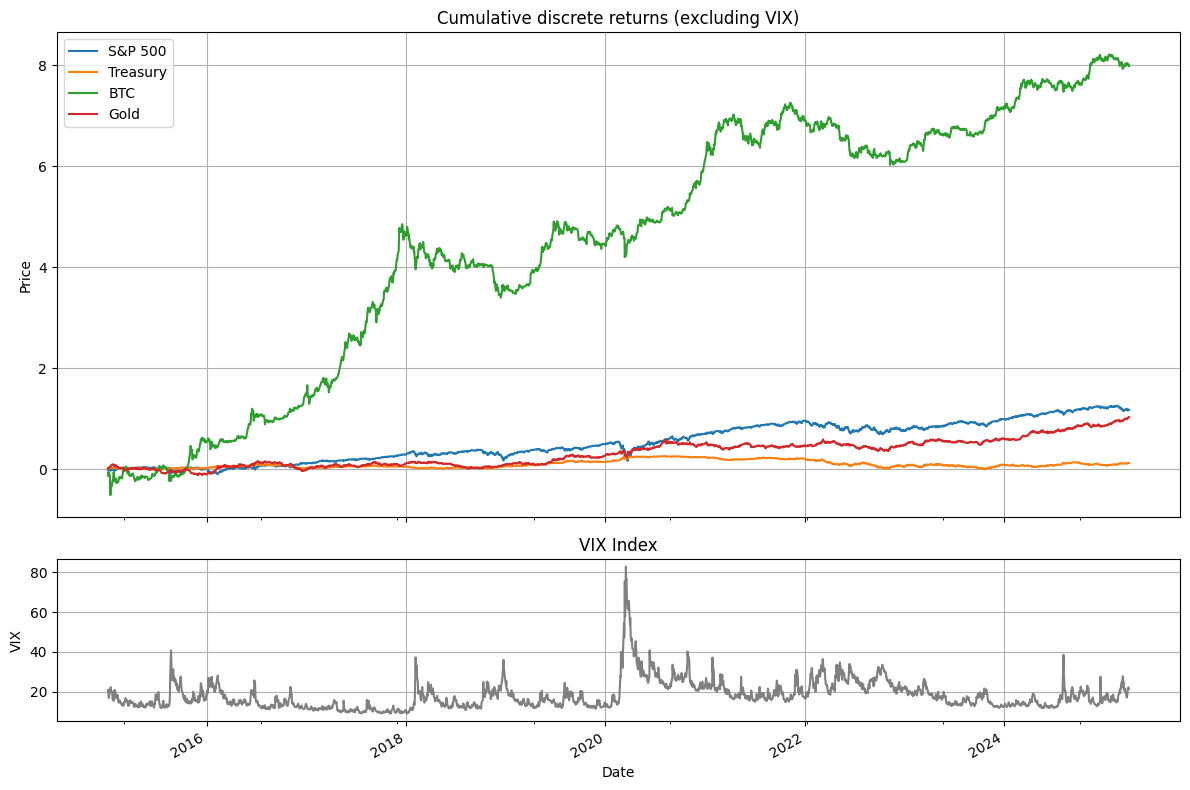

In [15]:
try:
    assets = pd.read_csv("../data/chapter_04/assets.csv")
    assets["Date"] = pd.to_datetime(assets["Date"])
    assets.set_index("Date", inplace=True)
except:
    tickers = ["^GSPC", "IEF", "^VIX", "BTC-USD", "GLD"]
    assets = yf.download(tickers, start = "2015-01-01")
    assets = assets.loc[:, "Close"].dropna()
    assets = assets.drop(["^VIX"], axis = 1).pct_change().merge(assets.loc[:, ["^VIX"]], left_index = True, right_index = True).dropna()
    assets.columns = ["BTC", "Gold", "Treasury", "S&P 500", "VIX"]
    assets = assets.loc[:, ["S&P 500", "Treasury", "BTC", "Gold", "VIX"]]
    assets.to_csv("../data/chapter_04/assets.csv")

non_vix_columns = [col for col in assets.columns if col != 'VIX']

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={'height_ratios': [3, 1]}, sharex=True)

# Upper plot: all assets except VIX
assets[non_vix_columns].cumsum().plot(ax=ax1)
ax1.set_title('Cumulative discrete returns (excluding VIX)')
ax1.set_ylabel('Price')
ax1.grid(True)

# Lower plot: VIX only
assets['VIX'].plot(ax=ax2, color='grey')
ax2.set_title('VIX Index')
ax2.set_ylabel('VIX')
ax2.grid(True)

# Final layout adjustments
plt.tight_layout()
plt.show()

A heatmap of the correlation matrix is shown below. All values meet the economic intution, i.e.:

* S&P 500
  - Moderately negatively correlated with **VIX** (-0.16), as expected during market stress.
  - Weakly positively correlated with **BTC** (0.22), suggesting that Bitcoin sometimes behaves like a high-beta equity.
  - Nearly uncorrelated with **Gold** (0.05), and mildly negatively with **Treasuries** (-0.17).

* Treasury Bonds
  - Positively correlated with **Gold** (0.38), reflecting their common role as safe-haven assets.
  - Negatively correlated with **equities** (-0.17), typical in flight-to-safety regimes.

* Bitcoin (BTC)
  - Slightly positively correlated with the **S&P 500** (0.22).
  - Weak correlations with all other assets, indicating it behaves largely independently.

* Gold
  - Strongest link with **Treasuries** (0.38).
  - Essentially uncorrelated with **VIX** (0.00), suggesting it doesn’t always move with short-term volatility spikes.

* VIX
  - Negatively correlated with **stocks** (-0.16), as expected.
  - Low correlations with all other assets, reinforcing its function as a market fear gauge rather than an investment asset.

These findings support classical asset behavior patterns and highlight the value of diversification across different asset classes. They also show that **Bitcoin**, while slightly connected to equity markets, still behaves differently from traditional safe-havens like **gold** and **Treasuries**.

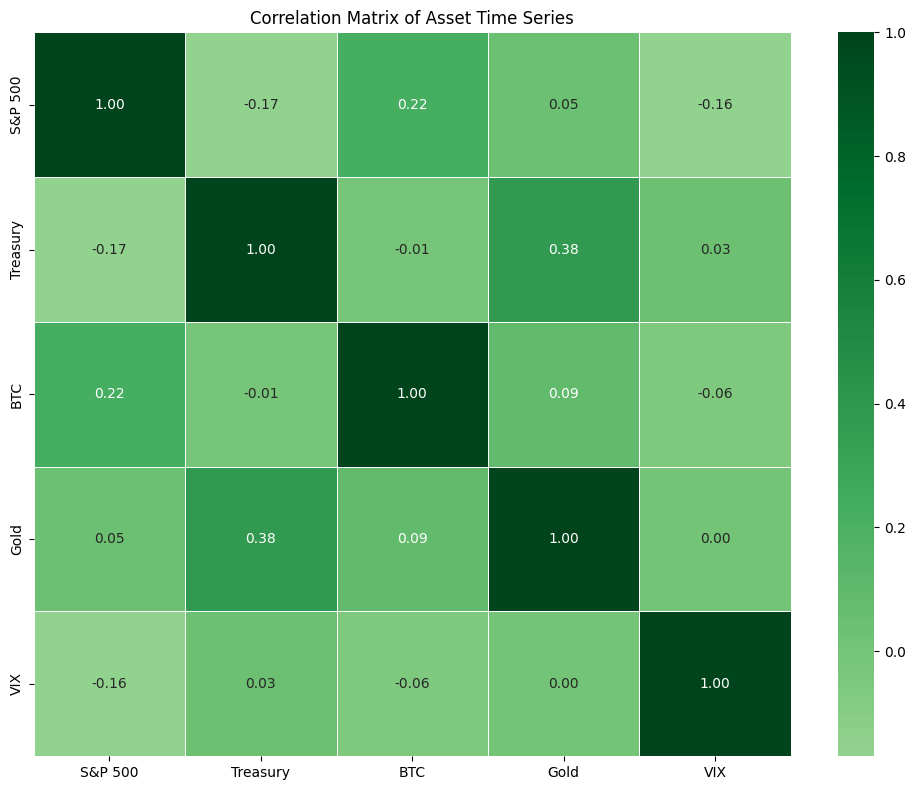

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = assets.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='Greens', center=0, linewidths=0.5)
plt.title("Correlation Matrix of Asset Time Series")
plt.tight_layout()
plt.show()